Exemplarische Kundensegmentierung mithilfe des k-means-Algorithmus im Lebensmitteleinzelhandel.

In diesem praktischen Beispiel wird der k-means-Algorithmus für den Einsatz im Lebensmitteleinzelhandel modelliert. Mithilfe des k-means-Algorithmus soll ein merkmalsbasierter Cluster aus einem exemplarischen Datensatz eines Lebensmitteleinzelhändlers erstellt werden. Die Cluster dienen dabei der merkmalsbasierten Zuordnung von Kunden nach ihren Gemeinsamkeiten. Für das folgende Beispiel wählt der Lebensmitteleinzelhändler die folgenden Merkmale: Einkommen, Ausgaben, Alter. Somit liegt eine multivariate Clusteranalyse vor, welche dem Machine-Learning-Teilbereich des Unsupervised Learning zuzuordnen ist. 

Dieses Fallbeispiel ist mithilfe der Programmiersprache Python 3.6 in dem interaktiven Journal Jupyter Lab erstellt worden. Dabei wurde sich im Folgenden auf den Kern der Kundensegmentierung beschänkt.

In [1]:
# Zunächst werden die benötigten Erweiterungen zur effizienten Datenverarbeitung von Python installiert.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Weiterhin werden Erweiterungen für die visuelle Darstellung der Daten installiert.
%matplotlib inline
import seaborn as sns; sns.set()  
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Deaktivieren von Warnmeldungen
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Im Folgeschritt wird der zugrundeliegende Datensatz nach ausgewählten Parametern des Anwenders erstellt. Dieses Vorgehen wurde gewählt, damit der Anwender dieses Skripts den zugrundeliegendenen Datensatz nach eigenem Ermessen ändern kann und somit nicht an starre Vorgaben gebunden ist. Das heißt, dass jeder Durchlauf dieses Skripts andere Werte innerhalb der gewählten Parameter erstellt. Die Einkommens- und Ausgabenswerte verstehen sich als €-Werte.

Hier wird somit vorausgesetzt, dass der Schritt "Geschäftliche Aspekte" des CRISP-DM-Modells bereits abgeschlossen ist. Da der Datensatz nach den Parametern des Anwenders erstellt wird, entfällt dabei der Schritt der Datenbereinigung. Im Sinne des CRISP-DM-Modells beginnt dieses exemplarische Beispiel, somit im Prozessschritt "Datenverständnis" mit dem Sammeln relevanter Datensätze und der anschließenden explorativen Datenanalyse.Im Folgeschritt wird der zugrundeliegende Datensatz nach ausgewählten Parametern des Anwenders erstellt. Dieses Vorgehen wurde gewählt, damit der Anwender dieses Skripts den zugrundeliegendenen Datensatz nach eigenem Ermessen ändern kann und somit nicht an starre Vorgaben gebunden ist. Das heißt, dass jeder Durchlauf dieses Skripts andere Werte innerhalb der gewählten Parameter erstellt. Die Einkommens- und Ausgabenswerte verstehen sich als €-Werte.

In [2]:
# Das Einkommen wird normalverteilt, um den Wert 35000 erstellt. 
# Die Ausgaben werden zufällig zwischen den Werten 500 bis 5000 erstellt.
# Das Alter wird ebenfalls zufällig zwischen den Werten 18 und 99 liegen.
# Die Anzahl der Beobachtungen beträgt in jedem Fall 5000.
# Letztlich werden alle generierten Daten in einen Datensatz namens "customer" zusammengeführt.

income = np.round(np.random.normal(loc = 35000, scale = 5000, size = 5000))
spending = np.round(np.random.randint(500, high=5000, size=5000))
age = np.random.randint(18, high=99, size=5000)
customer = np.column_stack((income, spending, age))

In [3]:
# Visuelle Ausgabe des Datensatzes.
dataset = pd.DataFrame({'Income': customer[:, 0], 'Spending': customer[:, 1], 'Age': customer[:, 2]})
print(dataset)

       Income  Spending   Age
0     31823.0    2702.0  34.0
1     36269.0    2786.0  35.0
2     30640.0     911.0  90.0
3     38615.0    4866.0  45.0
4     34785.0    1450.0  21.0
5     21910.0    1402.0  48.0
6     32064.0    3222.0  47.0
7     32194.0    2002.0  94.0
8     31652.0    4848.0  29.0
9     31360.0    3626.0  95.0
10    28704.0    4166.0  64.0
11    37094.0    4559.0  33.0
12    35531.0    4606.0  83.0
13    26086.0    2493.0  37.0
14    38436.0    4650.0  47.0
15    41316.0    1438.0  38.0
16    40113.0    3335.0  77.0
17    40023.0    4388.0  76.0
18    36324.0    2465.0  26.0
19    32076.0    2452.0  76.0
20    39217.0    2481.0  60.0
21    41038.0    3192.0  72.0
22    31964.0    4620.0  67.0
23    34473.0    4636.0  29.0
24    29132.0    3257.0  25.0
25    41609.0     605.0  21.0
26    36312.0     974.0  59.0
27    25619.0    2212.0  69.0
28    26022.0    4310.0  71.0
29    36440.0    2980.0  40.0
...       ...       ...   ...
4970  38405.0    4918.0  32.0
4971  3391

In [4]:
# Ausgabe des Datentyps. 
dataset.dtypes

Income      float64
Spending    float64
Age         float64
dtype: object

In [5]:
# Länge des Datensatzes.
len(dataset) 

5000

In [6]:
# Ausgabe der ersten fünf Beobachtungen des Datensatzes.
dataset.head(5)

,Income,Spending,Age
0,31823.0,2702.0,34.0
1,36269.0,2786.0,35.0
2,30640.0,911.0,90.0
3,38615.0,4866.0,45.0
4,34785.0,1450.0,21.0


In [7]:
# Ausgabe der letzten fünf Beobachtungen.
# Es ist zu beachten, dass der Index der letzten Beobachtung 4999 beträgt, da der Index in Python bei 0 beginnt.
dataset.tail()

,Income,Spending,Age
4995,32771.0,3839.0,55.0
4996,35290.0,726.0,40.0
4997,38022.0,3552.0,57.0
4998,35018.0,827.0,51.0
4999,36653.0,2326.0,26.0


In [8]:
# Ausgabe der deskriptiven Statistik.
round(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Income,5000.0,35008.0,4940.0,17241.0,31690.0,35028.0,38249.0,56101.0
Spending,5000.0,2724.0,1291.0,503.0,1619.0,2722.0,3826.0,4999.0
Age,5000.0,58.0,23.0,18.0,38.0,58.0,78.0,98.0


Text(0.5, 1.0, 'Distribution von Einkommen und Ausgaben')

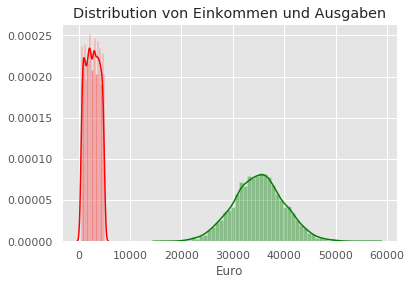

In [9]:
# Visualisierung der Distribution von Einkommen und Ausgaben.
# Die gewählte Normalverteilung des Einkommens wird ersichtlich.

sns.set_color_codes()
plot_income = sns.distplot(dataset["Income"], color="green")
plot_spending = sns.distplot(dataset["Spending"], color='red')
plt.xlabel('Euro')
plt.title('Distribution von Einkommen und Ausgaben')

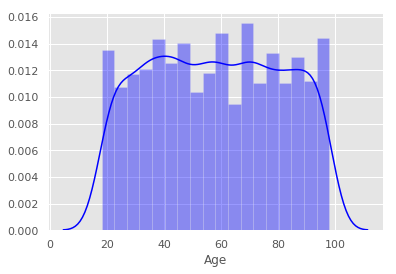

In [10]:
#Visualisierung der Distribution des Kundenalters.
sns.set_color_codes()
plot_age = sns.distplot(dataset["Age"], color='blue')

[(15000, 57000)]

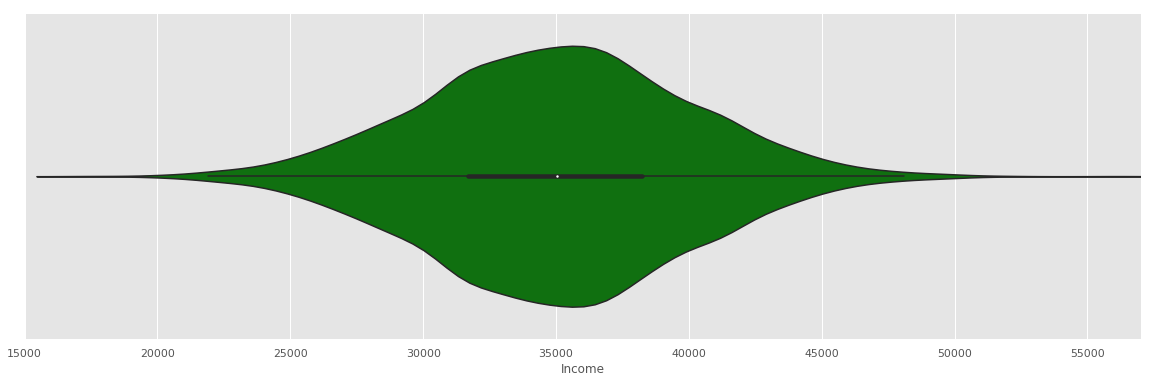

In [11]:
#Violin-Plot des Einkommens. 
f, axes = plt.subplots(1, figsize=(20,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='Income', color="green")
v1.set(xlim=(15000,57000))

Text(0.5, 1.0, 'Spending')

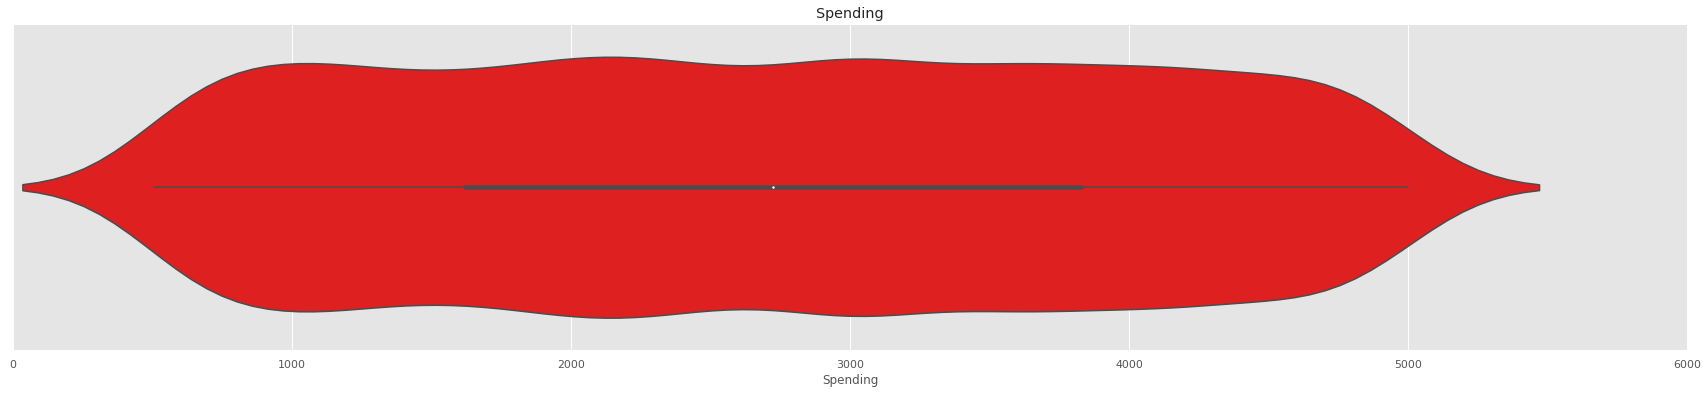

In [12]:
#Violin-Plot der Ausgaben
f, axes = plt.subplots(1, figsize=(30,6), sharex=True, sharey=True)
v2 = sns.violinplot(data=dataset, x='Spending', color="red")
v2.set(xlim=(0,6000))
plt.title('Spending')

[(0, 120)]

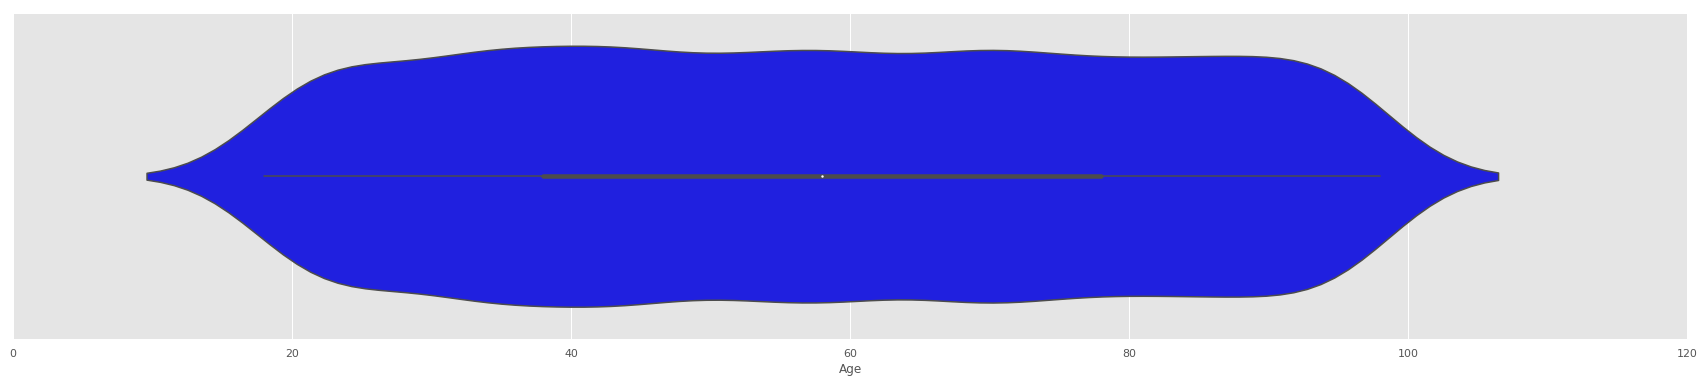

In [13]:
#Violin-Plot des Alters
f, axes = plt.subplots(1, figsize=(30,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='Age', color="blue")
v1.set(xlim=(0,120))

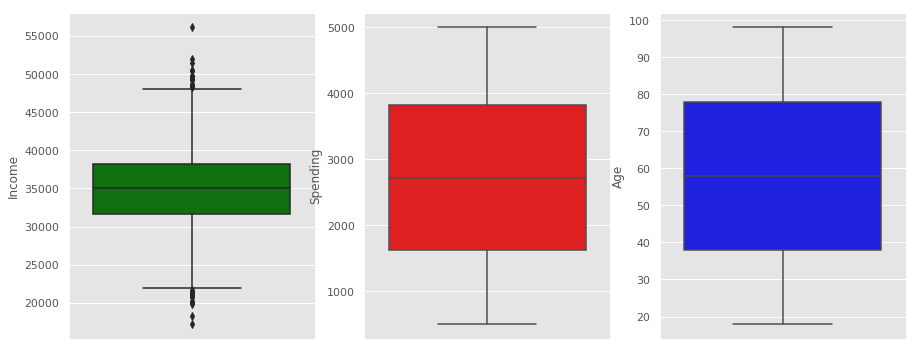

In [14]:
#Box-Plot der Variablen "Einkommen", "Ausgaben" und "Alter"

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=dataset["Income"], color="green")
plt.subplot(1,3,2)
sns.boxplot(y=dataset["Spending"], color='red')
plt.subplot(1,3,3)
sns.boxplot(y=dataset["Age"], color='blue')
plt.show()

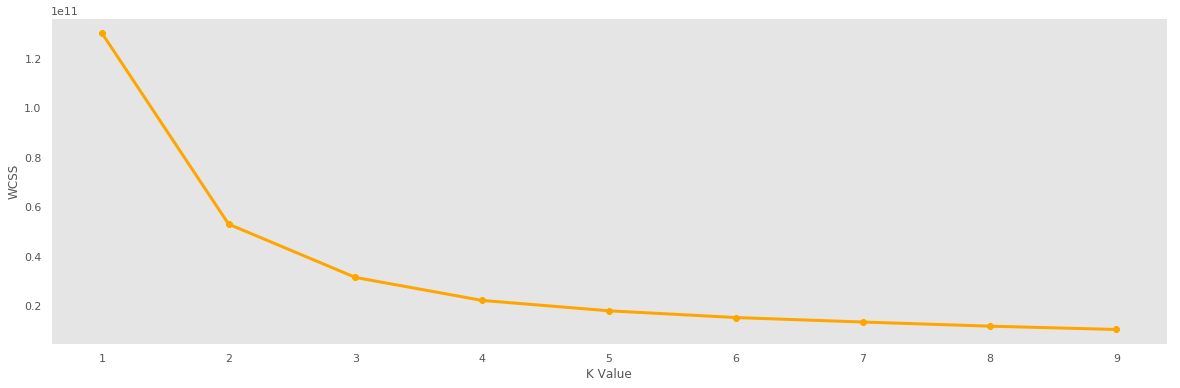

In [15]:
#Importieren des gewünschten Algorithmus. 
from sklearn.cluster import KMeans

#Ausführen der Ellbogenmethode.
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(dataset.iloc[:,:])
    wcss.append(kmeans.inertia_)
    
# Visualisierung der Ellbogenmethode.
plt.figure(figsize=(20,6))    
plt.grid()
plt.plot(range(1,10),wcss, linewidth=3, color="orange", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")
plt.show()

Da sich das Delta nach k=4 visuell stark verringert, bildet k=4 den Ellbogen. Vier Cluster bilden somit die optimale Menge. 

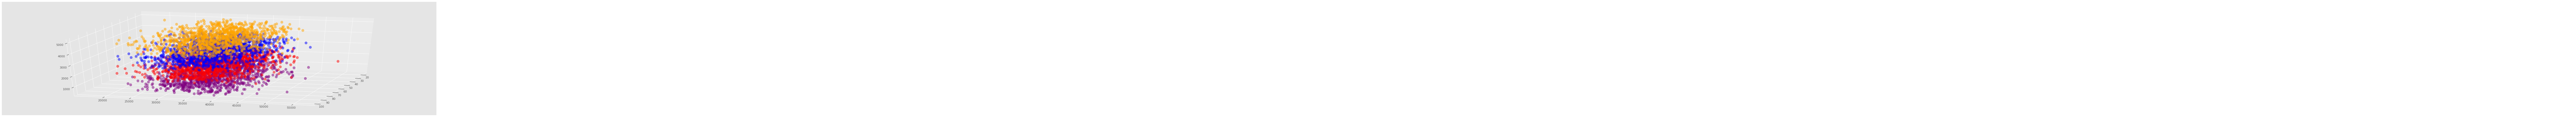

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

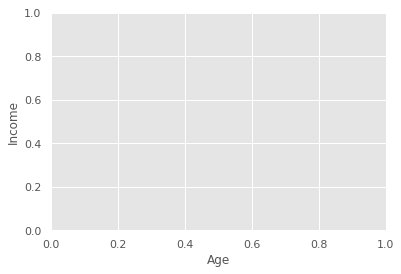

In [16]:

# Auswahl der gewünschten Cluster.
km = KMeans(n_clusters=4)
clusters = km.fit_predict(dataset.iloc[:,1:])
dataset['label'] = clusters

# Laden der 3D-Funktionalität für die Darstellung des multivariaten Datensatzes in Cluster.
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

# Visualisierung der Cluster.
fig = plt.figure(figsize=(30,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.Age[dataset.label == 0], dataset['Income'][dataset.label == 0], dataset['Spending'][dataset.label == 0], c='red', s=100, alpha=0.5)
ax.scatter(dataset.Age[dataset.label == 1], dataset['Income'][dataset.label == 1], dataset['Spending'][dataset.label == 1], c='orange', s=100, alpha=0.5)
ax.scatter(dataset.Age[dataset.label == 2], dataset['Income'][dataset.label == 2], dataset['Spending'][dataset.label == 2], c='blue', s=100, alpha=0.5)
ax.scatter(dataset.Age[dataset.label == 3], dataset['Income'][dataset.label == 3], dataset['Spending'][dataset.label == 3], c='purple', s=100, alpha=0.5)

# Rotation der Visualisierung.
for angle in range(0, 360):
    ax.view_init(30, 15)
    plt.draw()
    plt.pause(.001)

plt.xlabel('Age')
plt.ylabel('Income')
ax.set_zlabel('Spending')
plt.show()
 